In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import array
from scipy.stats import zscore
from scipy.stats import zscore
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, multilabel_confusion_matrix

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Flatten,BatchNormalization,Conv1D,Dense,Dropout,Input,Concatenate,GlobalMaxPooling1D,MaxPooling1D,AveragePooling1D,Activation

Using TensorFlow backend.


In [2]:
a = np.load('220vnoise.npy',allow_pickle=True)
df = pd.DataFrame(a, columns = ['Signal','Class','Sag','Swell','Intrpn','Harmonic','Flicker','Transient'])

signal = df.iloc[:, 0]
classes = np.array(df.iloc[:,1]).astype('int32')

df2=df.drop(['Signal','Class'],axis=1)
df2=df2.astype(str).astype('float32')
yarr=np.array(df2.iloc[:,:]).astype('int32')

s = []
for i in signal: 
    s.append(i)
signal = np.array(s)
signal = np.reshape(signal, (3961,200,1))
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(classes)
encoded_Y = encoder.transform(classes)
train_y = np_utils.to_categorical(encoded_Y)

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [11]:
trans = MinMaxScaler()
signal2= np.array(s)
signal2 = np.reshape(signal, (3961,200,1))
for i in range(len(signal)):
    signal2[i] = trans.fit_transform(signal[i])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(signal2, train_y, test_size=0.1, random_state=42)
x_train[0].shape

(200, 1)

In [16]:
model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(15, activation='softmax'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history3 = model3.fit(x_train, y_train, epochs=70, batch_size=10, verbose=2,callbacks=[estp])

Epoch 1/70
357/357 - 1s - loss: 2.2340 - accuracy: 0.3092
Epoch 2/70
357/357 - 1s - loss: 1.3295 - accuracy: 0.5850
Epoch 3/70
357/357 - 1s - loss: 0.8844 - accuracy: 0.7023
Epoch 4/70
357/357 - 1s - loss: 0.6777 - accuracy: 0.7719
Epoch 5/70
357/357 - 2s - loss: 0.5324 - accuracy: 0.8168
Epoch 6/70
357/357 - 1s - loss: 0.4563 - accuracy: 0.8434
Epoch 7/70
357/357 - 1s - loss: 0.3959 - accuracy: 0.8622
Epoch 8/70
357/357 - 1s - loss: 0.3657 - accuracy: 0.8712
Epoch 9/70
357/357 - 1s - loss: 0.3194 - accuracy: 0.8852
Epoch 10/70
357/357 - 1s - loss: 0.2845 - accuracy: 0.9010
Epoch 11/70
357/357 - 1s - loss: 0.2493 - accuracy: 0.9158
Epoch 12/70
357/357 - 1s - loss: 0.2303 - accuracy: 0.9242
Epoch 13/70
357/357 - 1s - loss: 0.2068 - accuracy: 0.9307
Epoch 14/70
357/357 - 1s - loss: 0.1868 - accuracy: 0.9425
Epoch 15/70
357/357 - 1s - loss: 0.1773 - accuracy: 0.9402
Epoch 16/70
357/357 - 2s - loss: 0.1718 - accuracy: 0.9447
Epoch 17/70
357/357 - 2s - loss: 0.1487 - accuracy: 0.9529
Epoch 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        23
           6       1.00      0.69      0.81        16
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        42
           9       1.00      1.00      1.00        23
          10       0.97      1.00      0.99        38
          11       1.00      1.00      1.00        35
          12       0.88      1.00      0.93        35
          13       1.00      0.96      0.98        26
          14       1.00      1.00      1.00        32

   micro avg       0.98      0.98      0.98       397
   macro avg       0.99      0.98      0.98       397
weighted avg       0.99   

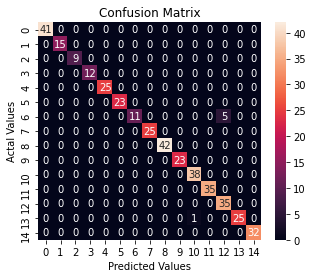

In [18]:
pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred3,zero_division=0))
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=multilabel_confusion_matrix(y_test, pred3)
yt=((np.argmax(y_test, axis=1)))
yp=((np.argmax(pred3, axis=1)))
cnf3=confusion_matrix(yt,yp)
cm_df3 = pd.DataFrame(cnf3,
                     index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], 
                     columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [19]:
trans = MinMaxScaler((-1,1))
signal2= np.array(s)
signal2 = np.reshape(signal, (3961,200,1))
for i in range(len(signal)):
    signal2[i] = trans.fit_transform(signal[i])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(signal2, train_y, test_size=0.1, random_state=42)
x_train[0].shape

(200, 1)

In [21]:
model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(15, activation='softmax'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history3 = model3.fit(x_train, y_train, epochs=70, batch_size=10, verbose=2,callbacks=[estp])

Epoch 1/70
357/357 - 1s - loss: 1.7200 - accuracy: 0.4905
Epoch 2/70
357/357 - 1s - loss: 0.6838 - accuracy: 0.7761
Epoch 3/70
357/357 - 1s - loss: 0.4520 - accuracy: 0.8488
Epoch 4/70
357/357 - 1s - loss: 0.3253 - accuracy: 0.8956
Epoch 5/70
357/357 - 2s - loss: 0.2571 - accuracy: 0.9113
Epoch 6/70
357/357 - 1s - loss: 0.2009 - accuracy: 0.9343
Epoch 7/70
357/357 - 1s - loss: 0.1879 - accuracy: 0.9318
Epoch 8/70
357/357 - 1s - loss: 0.1689 - accuracy: 0.9442
Epoch 9/70
357/357 - 1s - loss: 0.1432 - accuracy: 0.9512
Epoch 10/70
357/357 - 1s - loss: 0.1357 - accuracy: 0.9501
Epoch 11/70
357/357 - 1s - loss: 0.1271 - accuracy: 0.9562
Epoch 12/70
357/357 - 1s - loss: 0.1092 - accuracy: 0.9641
Epoch 13/70
357/357 - 1s - loss: 0.1104 - accuracy: 0.9610
Epoch 14/70
357/357 - 1s - loss: 0.0919 - accuracy: 0.9691
Epoch 15/70
357/357 - 1s - loss: 0.0976 - accuracy: 0.9658
Epoch 16/70
357/357 - 2s - loss: 0.0888 - accuracy: 0.9705
Epoch 17/70
357/357 - 1s - loss: 0.0754 - accuracy: 0.9770
Epoch 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        23
           6       1.00      0.94      0.97        16
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        42
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        38
          11       1.00      1.00      1.00        35
          12       0.97      1.00      0.99        35
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        32

   micro avg       1.00      1.00      1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00   

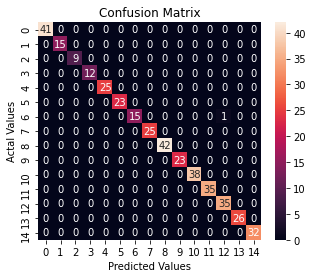

In [23]:
pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred3,zero_division=0))
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=multilabel_confusion_matrix(y_test, pred3)
yt=((np.argmax(y_test, axis=1)))
yp=((np.argmax(pred3, axis=1)))
cnf3=confusion_matrix(yt,yp)
cm_df3 = pd.DataFrame(cnf3,
                     index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], 
                     columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [24]:
transs = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(signal2, train_y, test_size=0.1, random_state=42)
for i in range(len(x_train)):
    x_train[i] = transs.fit_transform(x_train[i])
for i in range(len(x_test)):
    x_test[i] = transs.fit_transform(x_test[i])
    

In [29]:
model4 = Sequential()
model4.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model4.add(AveragePooling1D(pool_size=2))
model4.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model4.add(AveragePooling1D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model4.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model4.add(Dense(15, activation='softmax'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history4 = model4.fit(x_train, y_train, epochs=70, batch_size=10, verbose=2,callbacks=[estp])

Epoch 1/70
357/357 - 1s - loss: 1.5959 - accuracy: 0.4865
Epoch 2/70
357/357 - 1s - loss: 0.6665 - accuracy: 0.7637
Epoch 3/70
357/357 - 1s - loss: 0.4367 - accuracy: 0.8530
Epoch 4/70
357/357 - 1s - loss: 0.3026 - accuracy: 0.9074
Epoch 5/70
357/357 - 2s - loss: 0.2330 - accuracy: 0.9251
Epoch 6/70
357/357 - 1s - loss: 0.1810 - accuracy: 0.9425
Epoch 7/70
357/357 - 1s - loss: 0.1569 - accuracy: 0.9487
Epoch 8/70
357/357 - 1s - loss: 0.1416 - accuracy: 0.9551
Epoch 9/70
357/357 - 1s - loss: 0.1241 - accuracy: 0.9571
Epoch 10/70
357/357 - 1s - loss: 0.1035 - accuracy: 0.9666
Epoch 11/70
357/357 - 1s - loss: 0.0953 - accuracy: 0.9635
Epoch 12/70
357/357 - 1s - loss: 0.0828 - accuracy: 0.9722
Epoch 13/70
357/357 - 1s - loss: 0.0820 - accuracy: 0.9719
Epoch 14/70
357/357 - 1s - loss: 0.0682 - accuracy: 0.9753
Epoch 15/70
357/357 - 1s - loss: 0.0705 - accuracy: 0.9722
Epoch 16/70
357/357 - 1s - loss: 0.0714 - accuracy: 0.9781
Epoch 17/70
357/357 - 1s - loss: 0.0509 - accuracy: 0.9860
Epoch 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        25
           5       1.00      0.87      0.93        23
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        42
           9       0.92      1.00      0.96        23
          10       1.00      1.00      1.00        38
          11       1.00      1.00      1.00        35
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        32

   micro avg       0.99      0.99      0.99       397
   macro avg       0.99      0.99      0.99       397
weighted avg       0.99   

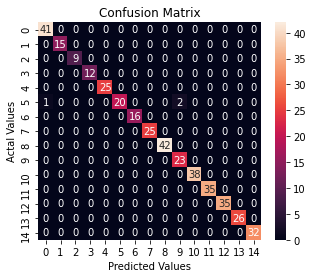

In [32]:
pred3 = model4.predict(x_test)
pred3=(pred3>0.5).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred3,zero_division=0))
cm=multilabel_confusion_matrix(y_test, pred3)
yt=((np.argmax(y_test, axis=1)))
yp=((np.argmax(pred3, axis=1)))
cnf3=confusion_matrix(yt,yp)
cm_df3 = pd.DataFrame(cnf3,
                     index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], 
                     columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()